### 🪚 這是用來**斷詞**的

In [221]:
def segment(text):
  return jieba.lcut(text)

### 🔍 這是用來**抓取特徵**的

In [222]:
def feature_extract(text, vectorizer):
  # 將 list 元素轉換為字串
  text = [' '.join(tokens) for tokens in text]  
  matrix = vectorizer.fit_transform(text)
  array = vectorizer.get_feature_names_out()
  feature_df = pd.DataFrame(matrix.toarray(), columns = array)
  return feature_df

### ⚙️ 這是用來**訓練模型**的

In [223]:
class Model:
  def __init__(self, feature, label, model):
    self.feature = feature
    self.label = label
    self.model = model

  # 將 data 分為 training set & test set
  def split_data(self):
    self.feat_train, self.feat_test, self.label_train, self.label_test = train_test_split(self.feature, self.label, test_size=0.3, random_state = 123) # test_size=0.3表示test set佔30%

  # 用training set 訓練模型
  def model_train(self):
    self.model.fit(self.feat_train, self.label_train)

  # 用訓練好的模型預測 test set
  def model_predict(self):
    self.prediction = self.model.predict(self.feat_test)
    print('predicted result: ' + str(self.prediction))

  # 評估模型表現
  def model_evaluate(self):
    print(ConfusionMatrixDisplay.from_predictions(self.label_test, self.prediction, cmap = "Blues")) # 混淆矩陣
    evaluation = precision_recall_fscore_support(self.label_test, self.prediction, average='macro') # 計算 precision, recall, F-score
    accuracy = accuracy_score(self.label_test, self.prediction) # 計算 accuracy
    print("accuracy: " + str(round(accuracy, 2)) + "\nprecision: " + str(round(evaluation[0], 2)) + "\nrecall: " + str(round(evaluation[1], 2)) + "\nfscore: " + str(round(evaluation[2],2)))


 ### 🧻使用jieba做斷詞與刪除stopwords
   ##### 程式內容：
 - 載入停用詞和使用者字典
 - 使用jieba斷詞並移除斷詞中的停用詞，最後將處理後的結果存回內文欄位。

In [224]:
output = []
df_new = pd.DataFrame()
file = './src/jieba_clean_result.csv'
stopword = open("stopwords_zhTW.txt", "r", encoding='UTF-8').read()
stopword_list = stopword.split("\n")
df = pd.read_csv('./src/original_data.csv')
new_word = open("./src/my_dict.txt", "r", encoding='UTF-8').read()
jieba.load_userdict("./src/my_dict.txt")
for text in df['clean_text']:
  jieba_clean_result = []
  jieba_result = jieba.lcut(text)
  for token in jieba_result:
    if token not in stopword_list:
      jieba_clean_result.append(token)
  output.append(jieba_clean_result)
df_new['jieba_clean_result'] = output
df_new.to_csv(file,index=False)

### 📑 TF-IDF
一樣用`feature_extract()`的功能\
`TfidfVectorizer()` 是計算 TF-IDF 的工具

In [225]:
tfidf_feature = feature_extract(df_new['jieba_clean_result'], TfidfVectorizer(tokenizer = segment))
tfidf_feature.iloc[: , 600:650]

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,一兵一卒,一再,一出,一刀,一分,一切,一切正常,一切都是,一到,一刻,...,一夜,一大,一大堆,一天,一天到晚,一套,一如既往,一定,一家,一家人
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.064861,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053469,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [226]:
bow = feature_extract(df_new['jieba_clean_result'], CountVectorizer(tokenizer = segment))
bow.iloc[: , 600:650]

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,一兵一卒,一再,一出,一刀,一分,一切,一切正常,一切都是,一到,一刻,...,一夜,一大,一大堆,一天,一天到晚,一套,一如既往,一定,一家,一家人
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## ⚙️ 訓練模型
我們使用兩種分類模型：
- 羅吉斯迴歸 Logistic Regression
- 支援向量機 Support Vector Machine

In [227]:
LR = LogisticRegression(random_state = 1223)
SVM = SVC(C=1, gamma='auto', kernel='linear', random_state = 123)

## ⚙️ Logistic Regression

predicted result: [0 2 0 3 0 0 0 2 0 1 2 2 0 2 2 0 2 0 0 2 0 0 2 0 2 3 0 0 3 0 0 0 0 0 2 0 0
 0 0 2 0 0 2 2 2 0 3 2 0 0 2 0 2 0 3 2 0 0 0 0 2 0 0 0 2 2 0 3 0 1 0 0 0 2
 0 2 2 0 0 2 0 2 0 0 0 2 0 2 2 0 2 2 3 2 2 2 2 0 0 2 0 2 3 0 0 2 2 2 2 2 0
 0 0 2 0 0 0 2 0 0 2 2 2 2 2 3 2 0 2 0 0 0 0 2 2 2 0 2 0 3 2 3 2 0 0 0 2 0
 2 2 0 0 2 0 2 2 0 3 2 0 2 2 2 2 2 0 0 3 2 2 2 0 0 1 0 2 0 0 2 0 2 0 0 2 2
 2 2 2 0 3 2 0 2 0 0 0 3 3 0 0 2 0 2 2 3 3 0 2 0 2 0 0 0 2 0 3 2 0 0 0 2 2
 2 2 2 0 2 2 2 2 2 0 0 2 2 3 2 3 0 2 2 0 2 0 0 2 2 2 0 2 2 0 0 0 0 0 2 0 2
 0 0 0 0 2 2 2 0 2 0 0 2 0 3 2 2 2 0 2 0 0 2 0 2 0 2 2 3 0 2 0 0 0 0 1 2 2
 0 0 3 0 3 2 0 2 0 0 0 0 2 0 2 0 2 0 0 2 3 0 0 2 0 0 2 2 3 2 2 2 0 3 2 2 0
 2 0 2 3 0 2 0 0 2 0 0 2 0 0 2 2 2 0 2 2 0 2 0 2 2 0 0 0 2 2 0 0 2 3 0 0]
accuracy: 0.6
precision: 0.63
recall: 0.5
fscore: 0.53


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


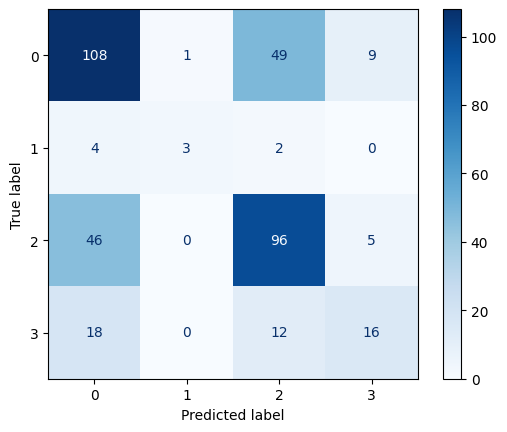

In [228]:
LR_model_bow = Model(bow,df['label'], LR)  
LR_model_bow.split_data()  
LR_model_bow.model_train()  
LR_model_bow.model_predict()  
LR_model_bow.model_evaluate()

## ⚙️ Support Vector Machine

predicted result: [0 2 0 0 0 0 0 2 0 1 2 2 0 2 2 0 2 0 0 2 0 0 0 0 2 3 0 0 3 0 0 0 0 2 2 0 0
 0 0 0 0 0 2 3 0 0 3 2 0 0 2 2 2 2 3 2 0 0 0 0 2 0 0 0 2 2 0 3 0 1 0 0 0 2
 0 0 2 0 0 2 0 2 0 0 0 2 0 2 2 0 2 3 2 2 2 2 2 0 0 2 0 2 3 0 0 2 2 0 2 2 0
 0 0 2 0 0 0 2 0 0 2 2 2 2 2 3 2 0 2 0 0 0 0 0 2 2 2 2 0 3 2 3 2 0 0 0 2 0
 3 2 0 0 2 0 2 2 0 3 2 0 2 2 2 2 2 0 0 3 2 2 2 2 0 2 0 2 0 0 2 0 2 0 3 2 2
 2 2 2 0 3 2 3 2 0 0 0 3 3 0 0 2 0 2 2 0 3 0 2 0 2 0 0 0 2 0 3 2 0 0 0 2 2
 2 2 2 0 2 2 2 2 0 0 0 2 3 3 2 3 0 2 0 0 2 0 0 2 2 2 0 2 2 0 0 0 0 0 0 0 2
 0 0 0 0 2 2 2 0 2 0 2 2 0 0 0 2 2 0 2 2 0 0 0 2 0 0 2 0 0 2 0 0 0 0 1 2 2
 0 0 3 0 3 2 0 2 0 0 0 0 3 0 0 0 0 0 0 0 3 0 0 2 0 2 2 2 3 2 0 2 0 3 2 2 0
 2 2 2 3 0 2 0 0 2 0 0 2 0 0 0 2 2 0 2 2 0 2 0 2 2 0 3 0 2 2 0 0 2 3 0 0]
accuracy: 0.61
precision: 0.67
recall: 0.49
fscore: 0.54


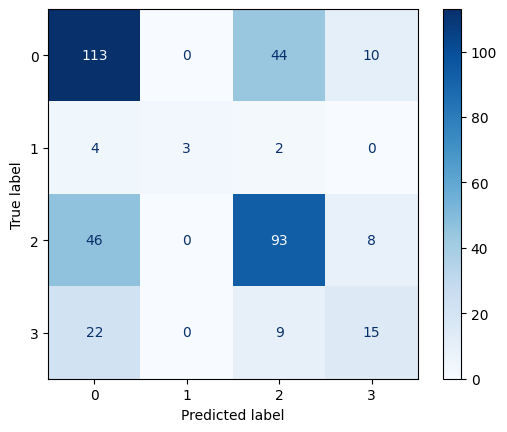

In [229]:
SVM_model_bow = Model(bow,df['label'], SVM)  
SVM_model_bow.split_data()  
SVM_model_bow.model_train()  
SVM_model_bow.model_predict()  
SVM_model_bow.model_evaluate()